חלק א׳ - חקירת מערך נתונים

In [1]:
#Import libraries:
import pandas as pd  # pandas is a package we will use to work with data tables
import matplotlib.pyplot as plt  # matplotlib is a package for plotting data
import matplotlib.style as style
style.use('tableau-colorblind10')
import seaborn as sns  # seaborn is also a package for plotting data, built on top of matplotlib
sns.set_palette("viridis")
import numpy as np  # numpy is a package for working with numerical data

In [2]:
#Reading the 'HW1_data.csv' file:
df_soccer = pd.read_csv('HW1_data.csv')

## question 1:

In [3]:
#1

df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   league    684 non-null    object 
 1   year      684 non-null    int64  
 2   position  684 non-null    int64  
 3   team      684 non-null    object 
 4   matches   684 non-null    int64  
 5   wins      684 non-null    int64  
 6   draws     684 non-null    int64  
 7   loses     684 non-null    int64  
 8   scored    684 non-null    int64  
 9   conceded  681 non-null    float64
 10  pts       684 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 58.9+ KB


We can see according to the "info()" of the data frame that there are 684 entries.

## question 2:

In [4]:
#2

df_soccer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   league    684 non-null    object 
 1   year      684 non-null    int64  
 2   position  684 non-null    int64  
 3   team      684 non-null    object 
 4   matches   684 non-null    int64  
 5   wins      684 non-null    int64  
 6   draws     684 non-null    int64  
 7   loses     684 non-null    int64  
 8   scored    684 non-null    int64  
 9   conceded  681 non-null    float64
 10  pts       684 non-null    int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 58.9+ KB


We can see according to the "info()" of the data frame that there are two fields of type "object", so we can be asure that they are categorical.
About the other columns, we can see according to the data frame table that the other fields are continuous, so thay are numerical.
To sum up:

The fields that are categorical are:
1. league
2. team

The fields that are numerical are:
1. year
2. position
3. matches
4. wins
5. draws
6. loses
7. scored
8. conceded
9. pts

## question 3:

In [5]:
#3

print('Number of unique values at "league" field:', len(df_soccer.league.unique()))
print()
print('Number of unique values at "team" field:', len(df_soccer.team.unique()))

Number of unique values at "league" field: 6

Number of unique values at "team" field: 168


## question 4:

In [6]:
#4

for i in df_soccer.columns:
    if df_soccer.isna().sum()[i] != 0:
        print('The field', i, 'have', df_soccer.isna().sum()[i], 'missing values.')

The field conceded have 3 missing values.


## question 5:

In [7]:
#5

print('Number of different teams over the years of:')
min_league = ''
temp = 0
flag = True
for diff_league in df_soccer.league.unique():
    if flag:
       temp = len(df_soccer[df_soccer.league == diff_league].team.unique())
       flag = False
    print(diff_league + ':',len(df_soccer[df_soccer.league == diff_league].team.unique()))
    if len(df_soccer[df_soccer.league == diff_league].team.unique()) < temp:
     temp = len(df_soccer[df_soccer.league == diff_league].team.unique())
     min_league = diff_league
print()
print("The league that has the least number of teams over the years is:", min_league)
#display(df_soccer[df_soccer.league == 'Bundesliga'].team.unique())

Number of different teams over the years of:
La_liga: 30
EPL: 30
Bundesliga: 24
Serie_A: 30
Ligue_1: 29
RFPL: 25

The league that has the least number of teams over the years is: Bundesliga


## question 6:

In [8]:
#6

#Method for calculate the avarge of scored goals per year.
def calculateAvgGoals(row):
    avg = row.scored/row.matches
    return avg

#Adds new columne to the data frame that store the avarge scored goals of each team per year.
df_soccer["avg_goals"] = df_soccer.apply(calculateAvgGoals, axis = 'columns')

#Creates a groupby object of 'team'.
gb_team = df_soccer.groupby('team')

#Prints the columns that describe the avarge scored goals of each team for every year.
for team, team_df_soccer in gb_team:
    print(team)
    display(team_df_soccer[['year', 'avg_goals']])

AC Milan


year  avg_goals
357  2014   1.473684
374  2015   1.289474
393  2016   1.500000
413  2017   1.473684
432  2018   1.447368
453  2019   1.657895

Alaves


year  avg_goals
48   2016   1.078947
73   2017   1.052632
89   2018   1.026316
115  2019   0.894737

Almeria


year  avg_goals
18  2014   0.921053

Amiens


year  avg_goals
540  2017   0.973684
563  2018   0.815789
586  2019   1.107143

Amkar


year  avg_goals
598  2014   0.833333
614  2015   0.733333
629  2016   0.833333
648  2017   0.666667

Angers


year  avg_goals
496  2015   1.052632
519  2016   1.052632
541  2017   1.105263
560  2018   1.157895
577  2019   1.000000

Anzhi Makhachkala


year  avg_goals
616  2015   0.933333
630  2016   0.800000
649  2017   1.033333
666  2018   0.433333

Arsenal


year  avg_goals
122  2014   1.868421
141  2015   1.710526
164  2016   2.026316
185  2017   1.947368
204  2018   1.921053
227  2019   1.473684

Arsenal Tula


year  avg_goals
603  2014   0.666667
634  2016   0.600000
642  2017   1.166667
657  2018   1.333333
676  2019   1.233333

Aston Villa


year  avg_goals
135  2014   0.815789
159  2015   0.710526
236  2019   1.078947

Atalanta


year  avg_goals
364  2014   1.000000
379  2015   1.078947
391  2016   1.631579
414  2017   1.500000
430  2018   2.026316
451  2019   2.578947

Athletic Club


year  avg_goals
6    2014   1.105263
24   2015   1.526316
46   2016   1.394737
75   2017   1.078947
87   2018   1.078947
110  2019   1.078947

Atletico Madrid


year  avg_goals
2    2014   1.763158
22   2015   1.657895
42   2016   1.842105
61   2017   1.526316
81   2018   1.447368
103  2019   1.342105

Augsburg


year  avg_goals
244  2014   1.264706
271  2015   1.235294
288  2016   1.029412
305  2017   1.264706
326  2018   1.500000
343  2019   1.323529

Barcelona


year  avg_goals
0    2014   2.894737
20   2015   2.947368
41   2016   3.052632
60   2017   2.605263
80   2018   2.368421
101  2019   2.263158

Bayer Leverkusen


year  avg_goals
243  2014   1.823529
260  2015   1.647059
287  2016   1.558824
296  2017   1.705882
315  2018   2.029412
334  2019   1.794118

Bayern Munich


year  avg_goals
240  2014   2.352941
258  2015   2.352941
276  2016   2.617647
294  2017   2.705882
312  2018   2.588235
330  2019   2.941176

Benevento


year  avg_goals
427  2017   0.868421

Bologna


year  avg_goals
381  2015   0.868421
402  2016   1.052632
422  2017   1.052632
437  2018   1.263158
458  2019   1.378378

Bordeaux


year  avg_goals
473  2014   1.236842
497  2015   1.315789
513  2016   1.394737
533  2017   1.394737
561  2018   0.894737
580  2019   1.428571

Borussia Dortmund


year  avg_goals
246  2014   1.382353
259  2015   2.411765
278  2016   2.117647
298  2017   1.882353
313  2018   2.382353
331  2019   2.470588

Borussia M.Gladbach


year  avg_goals
242  2014   1.558824
261  2015   1.970588
284  2016   1.323529
302  2017   1.382353
316  2018   1.617647
333  2019   1.941176

Bournemouth


year  avg_goals
155  2015   1.184211
167  2016   1.447368
190  2017   1.184211
213  2018   1.473684
238  2019   1.052632

Brescia


year  avg_goals
466  2019   0.921053

Brest


year  avg_goals
582  2019   1.214286

Brighton


year  avg_goals
194  2017   0.894737
216  2018   0.921053
234  2019   1.026316

Burnley


year  avg_goals
138  2014   0.736842
176  2016   1.026316
186  2017   0.947368
214  2018   1.184211
228  2019   1.131579

CSKA Moscow


year  avg_goals
589  2014   2.233333
604  2015   1.700000
621  2016   1.566667
637  2017   1.633333
655  2018   1.533333
671  2019   1.433333

Caen


year  avg_goals
480  2014   1.421053
494  2015   1.026316
523  2016   0.947368
543  2017   0.710526
566  2018   0.763158

Cagliari


year  avg_goals
365  2014   1.263158
399  2016   1.447368
423  2017   0.868421
442  2018   0.947368
460  2019   1.368421

Cardiff


year  avg_goals
217  2018   0.894737

Carpi


year  avg_goals
385  2015   0.973684

Celta Vigo


year  avg_goals
7    2014   1.236842
25   2015   1.342105
52   2016   1.394737
70   2017   1.552632
95   2018   1.394737
116  2019   0.973684

Cesena


year  avg_goals
367  2014   0.947368

Chelsea


year  avg_goals
120  2014   1.921053
149  2015   1.552632
160  2016   2.236842
184  2017   1.631579
202  2018   1.657895
223  2019   1.815789

Chievo


year  avg_goals
361  2014   0.736842
376  2015   1.131579
401  2016   1.131579
421  2017   0.947368
447  2018   0.657895

Cordoba


year  avg_goals
19  2014   0.578947

Crotone


year  avg_goals
404  2016   0.894737
425  2017   1.052632

Crystal Palace


year  avg_goals
129  2014   1.236842
154  2015   1.026316
173  2016   1.315789
189  2017   1.184211
211  2018   1.342105
233  2019   0.815789

Darmstadt


year  avg_goals
269  2015   1.117647
293  2016   0.823529

Deportivo La Coruna


year  avg_goals
15  2014   0.921053
34  2015   1.184211
55  2016   1.131579
77  2017   1.000000

Dijon


year  avg_goals
524  2016   1.210526
538  2017   1.447368
565  2018   0.815789
583  2019   0.964286

Dinamo Moscow


year  avg_goals
591  2014   1.766667
618  2015   0.833333
643  2017   0.966667
663  2018   0.933333
673  2019   0.900000

Eibar


year  avg_goals
17   2014   0.894737
33   2015   1.289474
49   2016   1.473684
68   2017   1.157895
91   2018   1.210526
113  2019   1.026316

Eintracht Frankfurt


year  avg_goals
249  2014   1.647059
273  2015   1.000000
286  2016   1.058824
301  2017   1.323529
318  2018   1.764706
338  2019   1.735294

Elche


year  avg_goals
12  2014   0.921053

Empoli


year  avg_goals
362  2014   1.210526
378  2015   1.052632
405  2016   0.763158
445  2018   1.342105

Espanyol


year  avg_goals
10   2014   1.236842
32   2015   1.052632
47   2016   1.289474
71   2017   0.947368
86   2018   1.263158
119  2019   0.710526

Everton


year  avg_goals
131  2014   1.263158
151  2015   1.552632
166  2016   1.631579
187  2017   1.157895
207  2018   1.421053
231  2019   1.157895

Evian Thonon Gaillard


year  avg_goals
485  2014   1.078947

FC Cologne


year  avg_goals
250  2014   1.000000
266  2015   1.117647
281  2016   1.500000
311  2017   1.029412
344  2019   1.500000

FC Krasnodar


year  avg_goals
590  2014   1.733333
607  2015   1.800000
623  2016   1.333333
639  2017   1.533333
654  2018   1.833333
670  2019   1.633333

FC Orenburg


year  avg_goals
632  2016   0.833333
658  2018   1.300000
683  2019   0.933333

FC Rostov


year  avg_goals
601  2014   0.900000
605  2015   1.366667
624  2016   1.200000
646  2017   0.900000
660  2018   0.833333
672  2019   1.500000

FC Tambov


year  avg_goals
682  2019   1.233333

FC Ufa


year  avg_goals
599  2014   0.866667
615  2015   0.833333
626  2016   0.733333
641  2017   1.133333
665  2018   0.800000
675  2019   0.733333

FC Yenisey Krasnoyarsk


year  avg_goals
667  2018        0.8

FK Akhmat


year  avg_goals
596  2014   1.000000
610  2015   1.166667
625  2016   1.266667
644  2017   1.000000
659  2018   0.933333
680  2019   0.900000

Fiorentina


year  avg_goals
351  2014   1.605263
372  2015   1.578947
395  2016   1.657895
415  2017   1.421053
441  2018   1.236842
457  2019   1.297297

Fortuna Duesseldorf


year  avg_goals
321  2018   1.441176
346  2019   1.058824

Freiburg


year  avg_goals
256  2014   1.058824
282  2016   1.235294
308  2017   0.941176
324  2018   1.352941
337  2019   1.411765

Frosinone


year  avg_goals
386  2015   0.921053
446  2018   0.763158

Fulham


year  avg_goals
218  2018   0.894737

GFC Ajaccio


year  avg_goals
506  2015   0.973684

Genoa


year  avg_goals
353  2014   1.631579
377  2015   1.184211
403  2016   1.000000
419  2017   0.868421
444  2018   1.026316
464  2019   1.189189

Getafe


year  avg_goals
13   2014   0.868421
38   2015   0.973684
67   2017   1.105263
85   2018   1.263158
107  2019   1.131579

Girona


year  avg_goals
69  2017   1.315789
97  2018   0.973684

Granada


year  avg_goals
16   2014   0.763158
36   2015   1.210526
59   2016   0.789474
106  2019   1.368421

Guingamp


year  avg_goals
477  2014   1.078947
503  2015   1.236842
517  2016   1.210526
539  2017   1.263158
567  2018   0.736842

Hamburger SV


year  avg_goals
254  2014   0.735294
267  2015   1.176471
289  2016   0.970588
310  2017   0.852941

Hannover 96


year  avg_goals
252  2014   1.176471
275  2015   0.911765
306  2017   1.294118
328  2018   0.911765

Hertha Berlin


year  avg_goals
255  2014   1.058824
264  2015   1.235294
280  2016   1.264706
303  2017   1.264706
322  2018   1.441176
339  2019   1.411765

Hoffenheim


year  avg_goals
247  2014   1.441176
272  2015   1.147059
279  2016   1.882353
297  2017   1.941176
320  2018   2.058824
335  2019   1.558824

Huddersfield


year  avg_goals
195  2017   0.736842
219  2018   0.578947

Hull


year  avg_goals
137  2014   0.868421
177  2016   0.973684

Ingolstadt


year  avg_goals
268  2015   0.970588
292  2016   1.058824

Inter


year  avg_goals
355  2014   1.552632
371  2015   1.315789
394  2016   1.894737
411  2017   1.736842
431  2018   1.500000
449  2019   2.131579

Juventus


year  avg_goals
348  2014   1.894737
368  2015   1.973684
388  2016   2.026316
408  2017   2.263158
428  2018   1.842105
448  2019   2.000000

Krylya Sovetov Samara


year  avg_goals
612  2015   0.633333
633  2016   1.033333
664  2018   0.833333
681  2019   1.100000

Kuban Krasnodar


year  avg_goals
597  2014   1.066667
617  2015   1.133333

Las Palmas


year  avg_goals
31  2015   1.184211
53  2016   1.394737
78  2017   0.631579

Lazio


year  avg_goals
350  2014   1.868421
375  2015   1.368421
392  2016   1.947368
412  2017   2.342105
435  2018   1.473684
450  2019   2.078947

Lecce


year  avg_goals
465  2019   1.324324

Leganes


year  avg_goals
56   2016   0.947368
76   2017   0.894737
92   2018   0.973684
117  2019   0.789474

Leicester


year  avg_goals
133  2014   1.210526
140  2015   1.789474
172  2016   1.263158
188  2017   1.473684
209  2018   1.342105
224  2019   1.763158

Lens


year  avg_goals
487  2014   0.842105

Levante


year  avg_goals
14   2014   0.894737
39   2015   0.973684
74   2017   1.157895
93   2018   1.552632
111  2019   1.236842

Lille


year  avg_goals
474  2014   1.131579
492  2015   1.026316
518  2016   1.052632
542  2017   1.078947
549  2018   1.789474
571  2019   1.250000

Liverpool


year  avg_goals
125  2014   1.368421
147  2015   1.657895
163  2016   2.052632
183  2017   2.210526
201  2018   2.342105
220  2019   2.236842

Lokomotiv Moscow


year  avg_goals
594  2014   1.033333
609  2015   1.433333
627  2016   1.300000
636  2017   1.366667
653  2018   1.500000
669  2019   1.366667

Lorient


year  avg_goals
483  2014   1.157895
502  2015   1.236842
525  2016   1.157895

Lyon


year  avg_goals
469  2014   1.894737
489  2015   1.763158
511  2016   2.105263
530  2017   2.289474
550  2018   1.842105
576  2019   1.500000

Mainz 05


year  avg_goals
251  2014   1.323529
263  2015   1.352941
290  2016   1.294118
307  2017   1.117647
323  2018   1.352941
342  2019   1.294118

Malaga


year  avg_goals
8   2014   1.105263
27  2015   1.000000
50  2016   1.289474
79  2017   0.631579

Mallorca


year  avg_goals
118  2019   1.052632

Manchester City


year  avg_goals
121  2014   2.184211
144  2015   1.868421
162  2016   2.105263
180  2017   2.789474
200  2018   2.500000
221  2019   2.684211

Manchester United


year  avg_goals
123  2014   1.631579
143  2015   1.289474
165  2016   1.421053
181  2017   1.789474
205  2018   1.710526
222  2019   1.736842

Marseille


year  avg_goals
471  2014   2.000000
501  2015   1.263158
512  2016   1.500000
531  2017   2.105263
552  2018   1.578947
569  2019   1.464286

Metz


year  avg_goals
486  2014   0.815789
521  2016   1.026316
547  2017   0.894737
581  2019   0.964286

Middlesbrough


year  avg_goals
178  2016   0.710526

Monaco


year  avg_goals
470  2014   1.342105
490  2015   1.500000
508  2016   2.815789
529  2017   2.236842
564  2018   1.000000
575  2019   1.571429

Montpellier


year  avg_goals
475  2014   1.210526
499  2015   1.289474
522  2016   1.263158
537  2017   0.947368
553  2018   1.394737
574  2019   1.250000

Mordovya


year  avg_goals
595  2014   0.733333
619  2015   1.000000

Nancy


year  avg_goals
526  2016   0.763158

Nantes


year  avg_goals
481  2014   0.763158
500  2015   0.868421
514  2016   1.052632
536  2017   0.947368
559  2018   1.263158
579  2019   1.000000

Napoli


year  avg_goals
352  2014   1.842105
369  2015   2.105263
390  2016   2.473684
409  2017   2.026316
429  2018   1.947368
454  2019   1.605263

Newcastle United


year  avg_goals
134  2014   1.052632
157  2015   1.157895
191  2017   1.026316
212  2018   1.105263
232  2019   1.000000

Nice


year  avg_goals
478  2014   1.157895
491  2015   1.526316
510  2016   1.657895
535  2017   1.394737
554  2018   0.789474
572  2019   1.464286

Nimes


year  avg_goals
556  2018   1.500000
585  2019   1.035714

Norwich


year  avg_goals
158  2015   1.026316
239  2019   0.684211

Nuernberg


year  avg_goals
329  2018   0.764706

Osasuna


year  avg_goals
58   2016   1.052632
109  2019   1.210526

PFC Sochi


year  avg_goals
679  2019   1.333333

Paderborn


year  avg_goals
257  2014   0.911765
347  2019   1.088235

Palermo


year  avg_goals
358  2014   1.394737
383  2015   1.000000
406  2016   0.868421

Paris Saint Germain


year  avg_goals
468  2014   2.184211
488  2015   2.684211
509  2016   2.184211
528  2017   2.842105
548  2018   2.763158
568  2019   2.777778

Parma


year  avg_goals
366  2014   0.868421

Parma Calcio 1913


year  avg_goals
443  2018   1.078947
459  2019   1.405405

Pescara


year  avg_goals
407  2016   0.921053

Queens Park Rangers


year  avg_goals
139  2014   1.105263

RasenBallsport Leipzig


year  avg_goals
277  2016   1.941176
299  2017   1.676471
314  2018   1.852941
332  2019   2.382353

Rayo Vallecano


year  avg_goals
9   2014   1.210526
37  2015   1.368421
99  2018   1.078947

Real Betis


year  avg_goals
29   2015   0.894737
54   2016   1.078947
65   2017   1.578947
90   2018   1.157895
114  2019   1.263158

Real Madrid


year  avg_goals
1    2014   3.105263
21   2015   2.894737
40   2016   2.789474
62   2017   2.473684
82   2018   1.657895
100  2019   1.842105

Real Sociedad


year  avg_goals
11   2014   1.157895
28   2015   1.184211
45   2016   1.552632
72   2017   1.736842
88   2018   1.184211
105  2019   1.473684

Real Valladolid


year  avg_goals
96   2018   0.842105
112  2019   0.842105

Reims


year  avg_goals
482  2014   1.236842
505  2015   1.157895
555  2018   1.026316
573  2019   0.928571

Rennes


year  avg_goals
476  2014   0.921053
495  2015   1.368421
515  2016   0.947368
532  2017   1.315789
557  2018   1.447368
570  2019   1.357143

Roma


year  avg_goals
349  2014   1.421053
370  2015   2.184211
389  2016   2.368421
410  2017   1.605263
433  2018   1.736842
452  2019   2.026316

Rubin Kazan


year  avg_goals
592  2014   1.300000
613  2015   1.100000
628  2016   1.000000
645  2017   1.066667
662  2018   0.800000
677  2019   0.600000

SC Bastia


year  avg_goals
479  2014   0.973684
498  2015   0.947368
527  2016   0.763158

SD Huesca


year  avg_goals
98  2018   1.131579

SKA-Khabarovsk


year  avg_goals
651  2017   0.533333

SPAL 2013


year  avg_goals
424  2017   1.026316
440  2018   1.157895
467  2019   0.702703

Saint-Etienne


year  avg_goals
472  2014   1.342105
493  2015   1.105263
516  2016   1.078947
534  2017   1.236842
551  2018   1.552632
584  2019   1.035714

Sampdoria


year  avg_goals
354  2014   1.263158
382  2015   1.263158
398  2016   1.289474
416  2017   1.473684
436  2018   1.578947
461  2019   1.263158

Sassuolo


year  avg_goals
359  2014   1.289474
373  2015   1.289474
397  2016   1.578947
418  2017   0.763158
438  2018   1.394737
455  2019   1.864865

Schalke 04


year  avg_goals
245  2014   1.235294
262  2015   1.500000
285  2016   1.323529
295  2017   1.558824
325  2018   1.088235
341  2019   1.117647

Sevilla


year  avg_goals
4    2014   1.868421
26   2015   1.342105
43   2016   1.815789
66   2017   1.289474
84   2018   1.631579
102  2019   1.421053

Sheffield United


year  avg_goals
229  2019   1.026316

Southampton


year  avg_goals
126  2014   1.421053
145  2015   1.552632
168  2016   1.078947
196  2017   0.973684
215  2018   1.184211
230  2019   1.342105

Spartak Moscow


year  avg_goals
593  2014   1.400000
608  2015   1.600000
620  2016   1.533333
638  2017   1.700000
656  2018   1.200000
674  2019   1.166667

Sporting Gijon


year  avg_goals
35  2015   1.052632
57  2016   1.105263

Stoke


year  avg_goals
128  2014   1.263158
148  2015   1.078947
171  2016   1.078947
197  2017   0.921053

Strasbourg


year  avg_goals
544  2017   1.157895
558  2018   1.526316
578  2019   1.185185

Sunderland


year  avg_goals
136  2014   0.815789
156  2015   1.263158
179  2016   0.763158

Swansea


year  avg_goals
127  2014   1.210526
150  2015   1.105263
174  2016   1.184211
198  2017   0.736842

Tom Tomsk


year  avg_goals
635  2016   0.566667

Torino


year  avg_goals
356  2014   1.263158
380  2015   1.368421
396  2016   1.868421
417  2017   1.421053
434  2018   1.368421
463  2019   1.216216

Torpedo Moscow


year  avg_goals
602  2014   0.933333

Tosno


year  avg_goals
650  2017   0.766667

Tottenham


year  avg_goals
124  2014   1.526316
142  2015   1.815789
161  2016   2.263158
182  2017   1.947368
203  2018   1.763158
225  2019   1.605263

Toulouse


year  avg_goals
484  2014   1.131579
504  2015   1.184211
520  2016   0.973684
545  2017   1.000000
562  2018   0.921053
587  2019   0.785714

Troyes


year  avg_goals
507  2015   0.736842
546  2017   0.842105

Udinese


year  avg_goals
363  2014   1.131579
384  2015   0.921053
400  2016   1.236842
420  2017   1.263158
439  2018   1.026316
462  2019   0.972973

Union Berlin


year  avg_goals
340  2019   1.205882

Ural


year  avg_goals
600  2014   1.033333
611  2015   1.300000
631  2016   0.800000
647  2017   1.033333
661  2018   1.100000
678  2019   1.200000

Valencia


year  avg_goals
3    2014   1.842105
30   2015   1.210526
51   2016   1.473684
63   2017   1.710526
83   2018   1.342105
108  2019   1.210526

Verona


year  avg_goals
360  2014   1.289474
387  2015   0.894737
426  2017   0.789474
456  2019   1.270270

VfB Stuttgart


year  avg_goals
253  2014   1.235294
274  2015   1.470588
300  2017   1.058824
327  2018   0.941176

Villarreal


year  avg_goals
5    2014   1.263158
23   2015   1.157895
44   2016   1.473684
64   2017   1.500000
94   2018   1.289474
104  2019   1.657895

Watford


year  avg_goals
152  2015   1.052632
175  2016   1.052632
193  2017   1.157895
210  2018   1.368421
237  2019   0.947368

Werder Bremen


year  avg_goals
248  2014   1.470588
270  2015   1.470588
283  2016   1.794118
304  2017   1.088235
319  2018   1.705882
345  2019   1.235294

West Bromwich Albion


year  avg_goals
132  2014   1.000000
153  2015   0.894737
170  2016   1.131579
199  2017   0.815789

West Ham


year  avg_goals
130  2014   1.157895
146  2015   1.710526
169  2016   1.236842
192  2017   1.263158
208  2018   1.368421
235  2019   1.289474

Wolfsburg


year  avg_goals
241  2014   2.117647
265  2015   1.382353
291  2016   1.000000
309  2017   1.058824
317  2018   1.823529
336  2019   1.411765

Wolverhampton Wanderers


year  avg_goals
206  2018   1.236842
226  2019   1.342105

Zenit St. Petersburg


year  avg_goals
588  2014   1.933333
606  2015   2.033333
622  2016   1.666667
640  2017   1.533333
652  2018   1.900000
668  2019   2.166667

In [9]:
#checking the correlation 
print(df_soccer.position.corr(df_soccer.avg_goals))

-0.7587818572237601


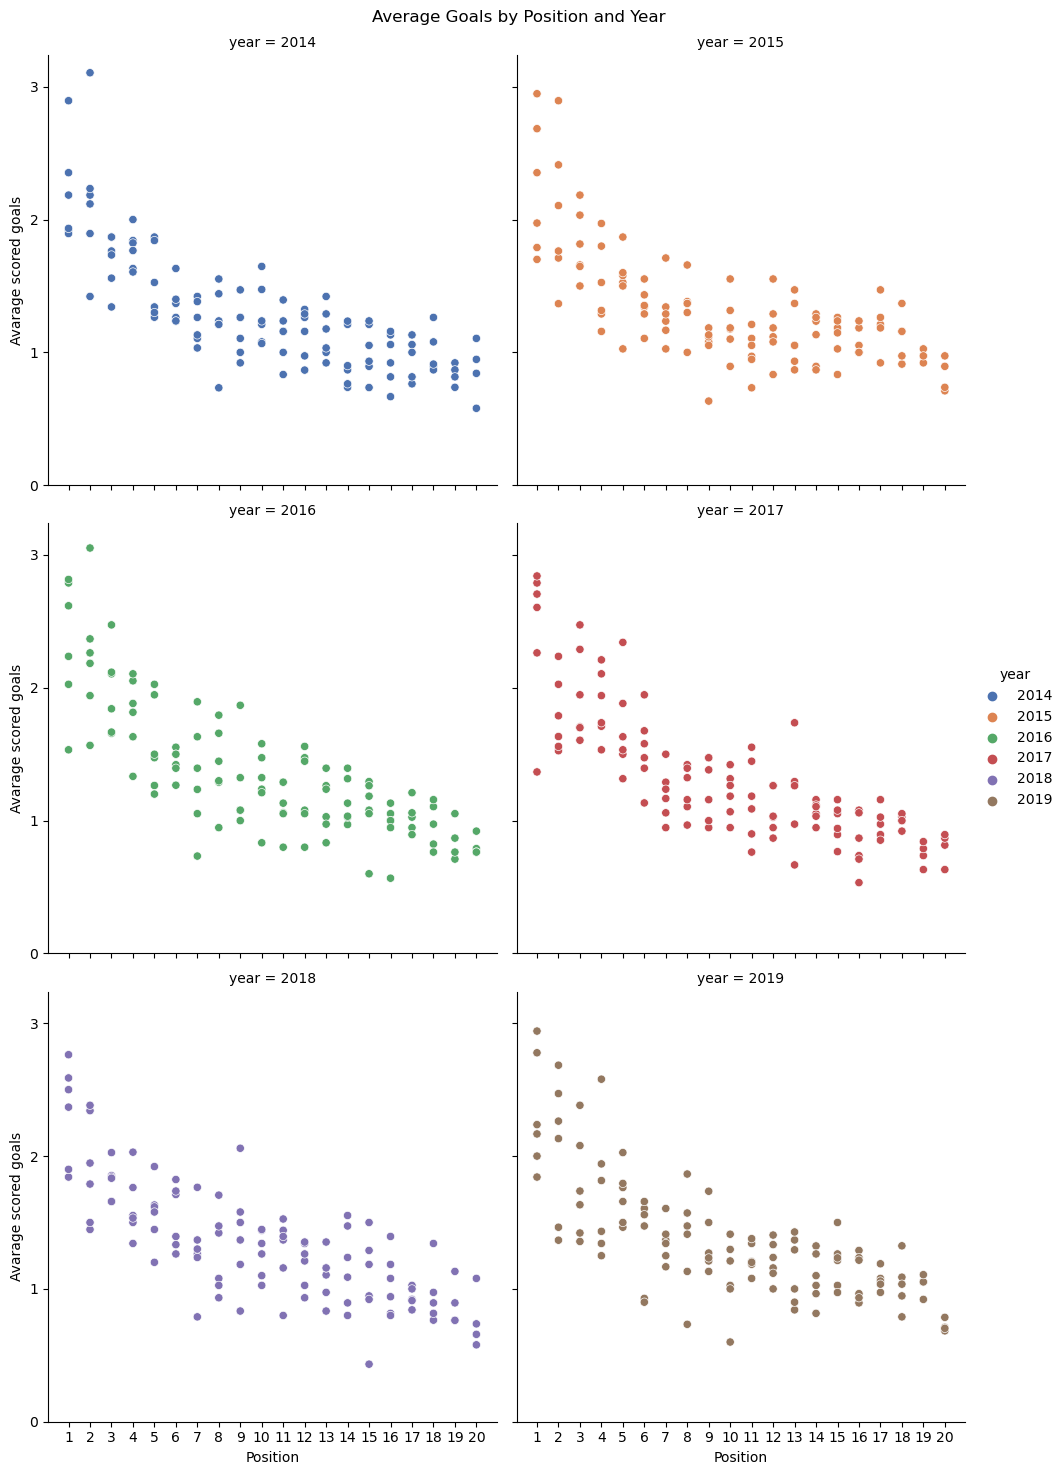

In [10]:
#Prints a scatterplot graph of the corilation between the avarage scored goals of each team to it's position in her league.
plot = sns.relplot(data=df_soccer, x="position", y="avg_goals", kind="scatter", hue="year", palette="deep", col = "year", col_wrap = 2);
plt.yticks(range(int(min(df_soccer["avg_goals"])), int(max(df_soccer["avg_goals"]+1)), 1))
plt.xticks(range(int(min(df_soccer["position"])), int(max(df_soccer["position"]+1)), 1))

plot.set_axis_labels("Position", "Avarage scored goals")
plot.fig.suptitle("Average Goals by Position and Year")
plt.subplots_adjust(top=0.95)

The corilation we have got(-0.7587) tells us that there is a liniar corilation(-1<-0.7587<0),
and even a strong corilation according to the high value of corilation pirson.

## question 7:

In [11]:
#7

#Creates a groupby object of 'league' and 'year', and calculate the median value of 'scored' for each league and year.
gb_median = df_soccer.groupby(['league', 'year']).median()['scored']

#Prints the groupby object we have created.
print(gb_median)

league      year
Bundesliga  2014    44.0
            2015    44.0
            2016    44.5
            2017    43.5
            2018    53.0
            2019    48.0
EPL         2014    46.5
            2015    48.5
            2016    47.5
            2017    44.5
            2018    51.5
            2019    46.5
La_liga     2014    43.0
            2015    45.5
            2016    53.0
            2017    46.5
            2018    47.0
            2019    46.0
Ligue_1     2014    44.0
            2015    46.0
            2016    42.5
            2017    45.5
            2018    46.0
            2019    33.0
RFPL        2014    31.0
            2015    34.5
            2016    30.5
            2017    31.5
            2018    30.5
            2019    36.5
Serie_A     2014    49.0
            2015    46.5
            2016    56.0
            2017    51.0
            2018    51.5
            2019    51.5
Name: scored, dtype: float64


C:\Users\liorb\AppData\Local\Temp\ipykernel_18768\2117126896.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_median = df_soccer.groupby(['league', 'year']).median()['scored']


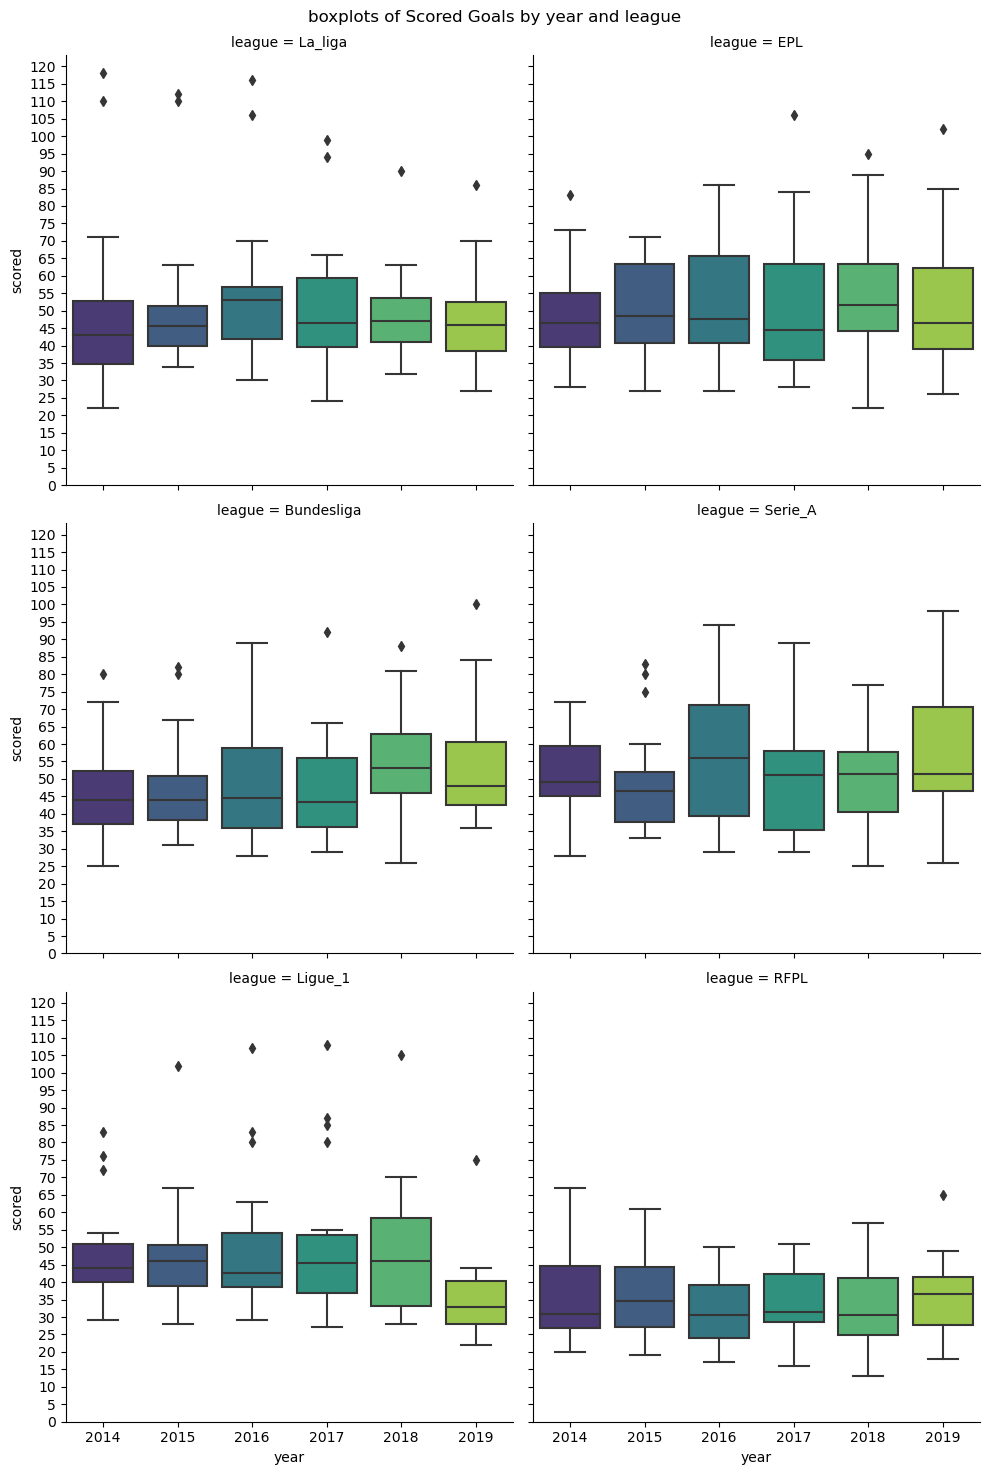

In [12]:
#Prints boxplots of the data above.
plot = sns.catplot( data = df_soccer, x="year", y="scored", kind="box" ,col = "league" , col_wrap = 2);
plt.yticks(range(min(df_soccer["scored"]) - 13, max(df_soccer["scored"]+5), 5))

plot.fig.suptitle("boxplots of Scored Goals by year and league")
plt.subplots_adjust(top=0.95)

We have found that the league that has the highest difference between the medians over the years is "ligue_1"(differnce of 13 goals scored(46 is the highest at year 2018 and 33 is the lowest at year 2019).

## question 8:

In [13]:
#8

#Method for calculate the sum of pts each team got at each year.
def calculatePts(row):
    sumOfPts = row.wins*3 + row.draws*1
    return sumOfPts

#Adds new columne to the data frame that store the sum of pts each team got at each year.
df_soccer['our_pts'] = df_soccer.apply(calculatePts, axis='columns')

#Method for compare our values of pts to the values that given to us.
def comparePts(row):
    if row.pts == row.our_pts:
        return True
    else:
        return None
    
#Adds new columne to the data frame that store boolian value - "True" if our values of pts to the values that given to us is equal, else - "None".
df_soccer['compare_pts'] = df_soccer.apply(comparePts, axis='columns')
display(df_soccer[['year', 'team', 'matches', 'wins', 'draws', 'loses', 'pts', 'our_pts', 'compare_pts']])


df_soccer.info()
print()
#we can use the `count()` method to count the number of non-NA values of 'compare_pts' column.
print("the number of non-NA values of 'compare_pts' column is: " + str(df_soccer.count()['compare_pts']) + " of total 684 entries.")
print()
print("We will Find information about the mistake:")
display(df_soccer[df_soccer['compare_pts'].isna() == True])

#the mistake happens to be in league is "Serie_A", year 2017, the team "Crotone". 

print('According to that the "Serie_A" league have 38 matches per year according to the information we got, and the max number that a team at that league')
print('and yaer can got is 38*3=116(if the team won all the games at that year), the given value of "pts" we have got is not possible,')
print('so the origin of the mistake is the given "pts" column')

year                   team  matches  wins  draws  loses  pts  our_pts  \
0    2014              Barcelona       38    30      4      4   94       94   
1    2014            Real Madrid       38    30      2      6   92       92   
2    2014        Atletico Madrid       38    23      9      6   78       78   
3    2014               Valencia       38    22     11      5   77       77   
4    2014                Sevilla       38    23      7      8   76       76   
..    ...                    ...      ...   ...    ...    ...  ...      ...   
679  2019              PFC Sochi       30     8      9     13   33       33   
680  2019              FK Akhmat       30     7     10     13   31       31   
681  2019  Krylya Sovetov Samara       30     8      7     15   31       31   
682  2019              FC Tambov       30     9      4     17   31       31   
683  2019            FC Orenburg       30     7      6     17   27       27   

    compare_pts  
0          True  
1          True  
2          True  
3          True  
4          True  
..          ...  
679        True  
680        True  
681        True  
682        True  
683        True  

[684 rows x 9 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   league       684 non-null    object 
 1   year         684 non-null    int64  
 2   position     684 non-null    int64  
 3   team         684 non-null    object 
 4   matches      684 non-null    int64  
 5   wins         684 non-null    int64  
 6   draws        684 non-null    int64  
 7   loses        684 non-null    int64  
 8   scored       684 non-null    int64  
 9   conceded     681 non-null    float64
 10  pts          684 non-null    int64  
 11  avg_goals    684 non-null    float64
 12  our_pts      684 non-null    int64  
 13  compare_pts  683 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 74.9+ KB

the number of non-NA values of 'compare_pts' column is: 683 of total 684 entries.

We will Find information about the mistake:


league  year  position     team  matches  wins  draws  loses  scored  \
425  Serie_A  2017        18  Crotone       38     9      8     21      40   

     conceded  pts  avg_goals  our_pts compare_pts  
425      66.0  180   1.052632       35        None

According to that the "Serie_A" league have 38 matches per year according to the information we got, and the max number that a team at that league
and yaer can got is 38*3=116(if the team won all the games at that year), the given value of "pts" we have got is not possible,
so the origin of the mistake is the given "pts" column


## question 9:

In [14]:
#9

#Method for compare the values of conceded goals to the values of scored goals.
def isFailure(row):
    if row.conceded != None:
            if row.conceded > row.scored:
                return True
            else:
                return None
    
#Adds new columne to the data frame that store boolian value - "True" if a team is conceded more goals than scored, else - "None".
df_soccer['is_failure'] = df_soccer.apply(isFailure, axis='columns')

#Gets an array that store the different leagues in the data frame.
arrOfLeagues = df_soccer.league.unique()

listCountFailure = []
#find the number of "failed teams" for over the years of each league and append to the empty list we have created.
for i in arrOfLeagues:
    filt = (df_soccer['league'] == i) & (df_soccer['is_failure'] == True)
    val = df_soccer.loc[filt].count()['is_failure']
    leagueAndVal = i + " " + str(val)
    listCountFailure.append(leagueAndVal)
    
display(listCountFailure)

['La_liga 75',
 'EPL 71',
 'Bundesliga 63',
 'Serie_A 63',
 'Ligue_1 69',
 'RFPL 52']

According to the results we got, the league with the most "failed teams" for over the years is "La_liga" league. 